In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/MyDrive/VIB DATA/4.Data_Deposit.csv"

'/content/gdrive/MyDrive/VIB DATA/4.Data_Deposit.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from sklearn.linear_model import LogisticRegression


# Data customer

In [ ]:
 data_customer = pd.read_csv('/content/gdrive/MyDrive/VIB DATA/1.Data_Customer.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
 data_customer.sort_values('CUSTOMER_NUMBER',ascending=True, inplace=True)
 data_customer = data_customer.fillna(0)
 data_customer = data_customer[data_customer['IB_REGISTER_DATE']!= 0]
 data_customer = data_customer[(data_customer['DATE_OF_BIRTH']!= '0996-07-28 00:00:00') &(data_customer['DATE_OF_BIRTH']!= '1061-06-12 00:00:00')]
data_customer = data_customer[data_customer['IB_REGISTER_DATE'] < '2020-01-01']
data_customer

,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD
56746,0,F,2019-09-16,1988-10-08 00:00:00,N,2019-09-17,BRANCH,N,SMART_OTP
74724,3,M,2019-04-16,1987-08-15 00:00:00,N,2019-06-05,MYVIB,Y,SMART_OTP
66835,9,M,2019-09-30,1982-04-15 00:00:00,N,2019-10-01,BRANCH,Y,SMART_OTP
147021,13,F,2019-09-06,1993-07-14 00:00:00,N,2019-09-06,BRANCH,N,SMART_OTP
20737,14,F,2019-07-02,1991-11-07 00:00:00,N,2019-07-02,AUTO-JOB,N,SMART_OTP
...,...,...,...,...,...,...,...,...,...
36578,999969,F,2019-03-22,1995-06-20 00:00:00,N,2019-03-22,BRANCH,Y,SMART_OTP
57576,999972,M,2019-08-19,1991-09-17 00:00:00,N,2019-08-20,BRANCH,Y,SMART_OTP
102172,999982,M,2019-07-22,1993-08-26 00:00:00,N,2019-07-26,AUTO-JOB,N,SMART_OTP
79131,999996,M,2019-10-02,1957-01-09 00:00:00,N,2019-10-02,BRANCH,Y,SMART_OTP


In [ ]:
data_customer['month'] = pd.DatetimeIndex(data_customer['DATE_OF_BIRTH']).year
data_customer['age'] = 2019 - data_customer['month']
data_customer[data_customer['age']==114]


,CUSTOMER_NUMBER,CLIENT_SEX,CLIENT_CREATE_DATE,DATE_OF_BIRTH,STAFF_VIB,IB_REGISTER_DATE,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,month,age
26726,152668,M,2019-09-03,1905-06-14 00:00:00,N,2019-10-09,MYVIB,N,SMART_OTP,1905,114
21011,436283,M,2019-09-03,1905-06-07 00:00:00,N,2019-10-03,MYVIB,N,SMART_OTP,1905,114
121721,540285,M,2019-05-23,1905-06-05 00:00:00,N,2019-07-09,BRANCH,Y,SMART_OTP,1905,114


In [ ]:
data_customerfn = data_customer.drop(['CLIENT_CREATE_DATE','DATE_OF_BIRTH','month','IB_REGISTER_DATE'], axis = 1)
data_customerfn

,CUSTOMER_NUMBER,CLIENT_SEX,STAFF_VIB,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,age
56746,0,F,N,BRANCH,N,SMART_OTP,31
74724,3,M,N,MYVIB,Y,SMART_OTP,32
66835,9,M,N,BRANCH,Y,SMART_OTP,37
147021,13,F,N,BRANCH,N,SMART_OTP,26
20737,14,F,N,AUTO-JOB,N,SMART_OTP,28
...,...,...,...,...,...,...,...
36578,999969,F,N,BRANCH,Y,SMART_OTP,24
57576,999972,M,N,BRANCH,Y,SMART_OTP,28
102172,999982,M,N,AUTO-JOB,N,SMART_OTP,26
79131,999996,M,N,BRANCH,Y,SMART_OTP,62


# data_my vib_transaction

In [ ]:
data_transac = pd.read_csv('/content/gdrive/MyDrive/VIB DATA/2.Data_MyVIB_Transaction.csv')
customer_trans = data_transac.groupby('CUSTOMER_NUMBER').agg({'TRANS_AMOUNT':'sum','TRANS_NO':'sum','TRANS_DATE':['max','min']})
customer_trans = customer_trans.reset_index()

customer_trans.columns = ['CUSTOMER_NUMBER','TOTAL_TRANS_AMOUNT','TRANS_NO','TRANS_DATEMAX','TRANS_DATEMIN']

In [ ]:
customer_trans

,CUSTOMER_NUMBER,TOTAL_TRANS_AMOUNT,TRANS_NO,TRANS_DATEMAX,TRANS_DATEMIN
0,0,249819000.0,11,2019-12-29,2019-09-26
1,9,11694976.0,6,2019-12-28,2019-12-05
2,15,51400000.0,3,2019-12-22,2019-10-31
3,32,22550050.0,40,2019-12-26,2019-09-19
4,44,25000000.0,3,2019-12-12,2019-05-13
...,...,...,...,...,...
52483,999965,4978000.0,2,2019-11-16,2019-01-26
52484,999966,4050000.0,2,2019-09-26,2019-09-10
52485,999969,64672500.0,97,2019-12-31,2019-04-01
52486,999972,25220000.0,11,2019-12-20,2019-10-04


# data my vib active

In [ ]:
data_trans = pd.read_csv('/content/gdrive/MyDrive/VIB DATA/3.Data_MyVIB_Activity.csv')
pd.set_option('display.max_rows',1000)
data_trans['ACTIVITY_DATE'] = pd.to_datetime(data_trans['ACTIVITY_DATE'])
active = data_trans.groupby('CUSTOMER_NUMBER').agg({'ACTIVITY_DATE':['max','min','nunique'],'ACTIVITY_HOUR':'mean'})
active.columns = ['date_max','date_min','active_count','activehour_mean']
active

,date_max,date_min,active_count,activehour_mean
CUSTOMER_NUMBER,,,,
0,2019-12-29,2019-09-26,12,13.095238
3,2019-12-20,2019-06-05,14,15.478261
9,2019-12-28,2019-10-01,34,13.179894
13,2019-09-07,2019-09-06,2,17.307692
15,2019-12-31,2019-10-30,8,14.172414
...,...,...,...,...
999966,2019-12-12,2019-09-10,6,17.093750
999969,2019-12-31,2019-03-28,85,13.921053
999972,2019-12-30,2019-08-20,19,15.669173


## Merge dữ liệu customer, vib active and vib transaction. 


In [ ]:
from functools import reduce
data_frames = [data_customerfn,customer_trans,active]
df1 = reduce(lambda  left,right: pd.merge(left,right,on=['CUSTOMER_NUMBER'],
                                            how='outer'), data_frames)
df1
pd.set_option('display.max_rows',1000)
df1 = df1.fillna('a')
df1

,CUSTOMER_NUMBER,CLIENT_SEX,STAFF_VIB,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,age,TOTAL_TRANS_AMOUNT,TRANS_NO,TRANS_DATEMAX,TRANS_DATEMIN,date_max,date_min,active_count,activehour_mean
0,0,F,N,BRANCH,N,SMART_OTP,31,2.49819e+08,11,2019-12-29,2019-09-26,2019-12-29 00:00:00,2019-09-26 00:00:00,12,13.0952
1,3,M,N,MYVIB,Y,SMART_OTP,32,a,a,a,a,2019-12-20 00:00:00,2019-06-05 00:00:00,14,15.4783
2,9,M,N,BRANCH,Y,SMART_OTP,37,1.1695e+07,6,2019-12-28,2019-12-05,2019-12-28 00:00:00,2019-10-01 00:00:00,34,13.1799
3,13,F,N,BRANCH,N,SMART_OTP,26,a,a,a,a,2019-09-07 00:00:00,2019-09-06 00:00:00,2,17.3077
4,14,F,N,AUTO-JOB,N,SMART_OTP,28,a,a,a,a,a,a,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134510,985119,a,a,a,a,a,a,a,a,a,a,2019-09-16 00:00:00,2019-05-04 00:00:00,2,14
134511,990321,a,a,a,a,a,a,a,a,a,a,2019-08-31 00:00:00,2019-08-31 00:00:00,1,18
134512,990745,a,a,a,a,a,a,a,a,a,a,2019-11-16 00:00:00,2019-11-16 00:00:00,1,10
134513,997954,a,a,a,a,a,a,a,a,a,a,2019-12-11 00:00:00,2019-12-11 00:00:00,1,18


In [ ]:
df2 = df1
df2.drop('left3',axis = 1,inplace=True)

KeyError: ignored

In [ ]:
df2.replace('a',0,inplace=True)
df2['date_max'] = pd.to_datetime(df2['date_max'])
df2['next_buyac'] = df2['date_max'] + datetime.timedelta(days = 90)

ValueError: ignored

## Xác định người rời bỏ dịch vụ: 
Ngườ rời bỏ dịch vụ là những người như sau: 


1.   Là người đã đăg kí Internet banking và trong ba tháng gần nhất không có giao dịch, active trên ứng dụng này tính đến ngày 31-12-2019 (active_nota)
2.   Là người đã đăng kí Internet Banking, nhưng không active, không có giao dịch nào trên My VIB (active_a1)
3. Là người đã đăng kí INternet Banking, không active, nhưng trog ba tháng gần đây nhất không có giao dịch nào, tính đến ngày 31-12-2019. (active_a2)



In [ ]:
## xacs định khách hàng có active và không active
## tập hợp những khách hàng không active
active_a = df1[df1['active_count'] == 'a']
## tập hợp những khách hàng active
active_nota = df1[df1['active_count'] != 'a']
## tập hợp khách hàng không active, và không cso transaction
active_a1 = active_a[active_a['TRANS_NO']=='a']
## tâp hợp khách hàng không active, nhưng có transaction
active_a2 = active_a[active_a['TRANS_NO']!='a']


In [ ]:
len(active_a)

56774

In [ ]:
len(active_nota)

77741

In [ ]:
### Xác định rời bỏ với nhóm đối tượng active
active_nota['new_buy'] = active_nota['date_max'] + datetime.timedelta(days = 90)
active_nota
active_nota['left2'] = active_nota['new_buy'] < pd.to_datetime('2019-12-31')
active_nota.left2 = active_nota.left2.replace({False:'0',True:'1'})
active_nota.left2.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

0    70602
1     7139
Name: left2, dtype: int64

In [ ]:
## Xác định rời bỏ với nhóm đối tượng không có giao dịch, không active
active_a1['left2'] = '1'
active_a1.left2.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    56403
Name: left2, dtype: int64

In [ ]:
## Xác định rời bỏ với nhóm đối tượng không active, nhưng có giao dịch
active_a2['TRANS_DATEMAX'] = pd.to_datetime(active_a2['TRANS_DATEMAX'])
active_a2['new_buy'] = active_a2['TRANS_DATEMAX'] + datetime.timedelta(days = 90)
active_a2['left2'] = active_a2['new_buy'] < pd.to_datetime('2019-12-31')
active_a2.left2 = active_a2.left2.replace({False:'0',True:'1'})
active_a2.left2.value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

0    254
1    117
Name: left2, dtype: int64

In [ ]:
df_left = pd.concat([active_nota,active_a1,active_a2])
df_left.sort_values('CUSTOMER_NUMBER',ascending = True, inplace=True)
df_left.left2 = df_left.left2.str.strip()
df_left.left2.value_counts()

0    70856
1    63659
Name: left2, dtype: int64

In [ ]:
df_myVIB = df_left[(df_left['CLIENT_SEX']!=0) & (df_left['CLIENT_SEX']!='a')]
df_myVIB.left2.value_counts()

0    70690
1    63472
Name: left2, dtype: int64

In [ ]:
df_myVIB = df_myVIB.drop(['TRANS_DATEMAX','TRANS_DATEMIN','date_max','date_min','new_buy'],axis = 1)
df_myVIB.isna().sum()

CUSTOMER_NUMBER        0
CLIENT_SEX             0
STAFF_VIB              0
EB_REGISTER_CHANNEL    0
SMS                    0
VERIFY_METHOD          0
age                    0
TOTAL_TRANS_AMOUNT     0
TRANS_NO               0
active_count           0
activehour_mean        0
left2                  0
dtype: int64

## DATA DEPOSIT

In [ ]:
data_deposit = pd.read_csv('/content/gdrive/MyDrive/VIB DATA/4.Data_Deposit.csv')
data_deposit['MONTH'] = pd.to_datetime(data_deposit['MONTH'])
data_deposit.sort_values(by = ['CUSTOMER_NUMBER','MONTH'],ascending = (True,False), inplace = True)
dep1 = data_deposit.drop_duplicates(subset=['CUSTOMER_NUMBER'], keep = 'first')
dep1 = dep1.drop(['MONTH','AVG_CA_BALANCE','AVG_TD_BALANCE'],axis = 1)
dep1['COUNT_CA_ACCT'] = dep1['COUNT_CA_ACCT'].replace([2,3,4,5,6,7,8,10],1)
dep1['COUNT_TD_ACCT'] = dep1['COUNT_TD_ACCT'].replace([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,17,24,33,20,21,23,27,36],1)

In [ ]:
data_deposit['MONTH'] = pd.to_datetime(data_deposit['MONTH'])
datade = data_deposit.groupby('CUSTOMER_NUMBER').agg({'AVG_CA_BALANCE':'sum','AVG_TD_BALANCE':'sum'})
datade.columns = ['current account', 'term account']
datade = datade.reset_index()
datade

,CUSTOMER_NUMBER,current account,term account
0,0,92856840.85,0.0
1,3,3722174.98,0.0
2,4,2205938.00,643548387.1
3,7,4392673.57,0.0
4,9,12951325.77,0.0
...,...,...,...
223812,999977,11382302.14,0.0
223813,999982,474193.55,0.0
223814,999993,407301.07,0.0
223815,999996,64413149.41,0.0


In [ ]:
data_depositfn = pd.merge(datade,dep1,how = 'outer', on = 'CUSTOMER_NUMBER')
data_depositfn
data_depositfn['COUNT_TD_ACCT'].value_counts()

0    187081
1     36736
Name: COUNT_TD_ACCT, dtype: int64

# DATA LENDING

In [ ]:
data_lending = pd.read_csv('/content/gdrive/MyDrive/VIB DATA/5.Data_Lending.csv')
data_lendingfn = data_lending.groupby('CUSTOMER_NUMBER').agg({'COUNT_OF_LOAN':'sum','AVG_LOAN_AMOUNT':'sum'})
data_lendingfn['COUNT_OF_LOAN'] = 1
data_lendingfn['COUNT_OF_LOAN'].value_counts()
data_lendingfn

,COUNT_OF_LOAN,AVG_LOAN_AMOUNT
CUSTOMER_NUMBER,,
7,1,1.638486e+09
8,1,2.118730e+08
9,1,4.624167e+09
14,1,7.417049e+07
16,1,5.962500e+09
...,...,...
999926,1,1.182219e+09
999928,1,8.142000e+08
999953,1,1.330000e+09


# DATA CARD

In [ ]:
data_card = pd.read_csv('/content/gdrive/MyDrive/VIB DATA/6.Data_Card.csv')
data_cardfn = data_card[data_card['MONTH'] =='12/31/2019']
data_cardfn.drop('MONTH',axis = 1, inplace= True)
data_cardfn.sort_values('CUSTOMER_NUMBER', ascending = True, inplace=True)
data_cardfn
data_cardfn['COUNT_DEBITCARD'] = data_cardfn['COUNT_DEBITCARD'].replace([2,3,4,5,6,7,8,9,10,11,12,19],1)
data_cardfn['COUNT_CREDITCARD'] = data_cardfn['COUNT_CREDITCARD'].replace([2,3,4,5,6,7,10,11,13],1)
data_cardfn
data_card

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,MONTH,COUNT_CREDITCARD,COUNT_DEBITCARD,CUSTOMER_NUMBER
0,9/30/2019,0,1,914326
1,4/30/2019,0,1,914326
2,11/30/2019,0,1,914326
3,8/31/2019,0,1,914326
4,12/31/2019,0,1,914326
...,...,...,...,...
871584,12/31/2019,0,1,458175
871585,12/31/2019,1,0,738986
871586,12/31/2019,0,1,778813
871587,12/31/2019,1,0,671312


## MERGE DATA

In [ ]:
from functools import reduce
data_frames = [df_myVIB,data_depositfn,data_lendingfn,data_cardfn]

In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['CUSTOMER_NUMBER'],
                                            how='outer'), data_frames)
df_merged


,CUSTOMER_NUMBER,CLIENT_SEX,STAFF_VIB,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,age,TOTAL_TRANS_AMOUNT,TRANS_NO,active_count,activehour_mean,left2,current account,term account,COUNT_CA_ACCT,COUNT_TD_ACCT,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,COUNT_CREDITCARD,COUNT_DEBITCARD
0,0,F,N,BRANCH,N,SMART_OTP,31,2.49819e+08,11,12,13.0952,0,92856840.85,0.0,1.0,0.0,NaN,NaN,0.0,1.0
1,3,M,N,MYVIB,Y,SMART_OTP,32,a,a,14,15.4783,0,3722174.98,0.0,1.0,0.0,NaN,NaN,0.0,1.0
2,9,M,N,BRANCH,Y,SMART_OTP,37,1.1695e+07,6,34,13.1799,0,12951325.77,0.0,1.0,0.0,1.0,4.624167e+09,0.0,1.0
3,13,F,N,BRANCH,N,SMART_OTP,26,a,a,2,17.3077,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,14,F,N,AUTO-JOB,N,SMART_OTP,28,a,a,a,a,1,NaN,NaN,NaN,NaN,1.0,7.417049e+07,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262532,999153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
262533,999268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
262534,999382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
262535,999395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0


## CLEANSING DATA

In [ ]:
df_merged.isna().sum()

CUSTOMER_NUMBER             0
CLIENT_SEX             128375
STAFF_VIB              128375
EB_REGISTER_CHANNEL    128375
SMS                    128375
VERIFY_METHOD          128375
age                    128375
TOTAL_TRANS_AMOUNT     128375
TRANS_NO               128375
active_count           128375
activehour_mean        128375
left2                  128375
current account         38720
term account            38720
COUNT_CA_ACCT           38720
COUNT_TD_ACCT           38720
COUNT_OF_LOAN          160523
AVG_LOAN_AMOUNT        160523
COUNT_CREDITCARD       112078
COUNT_DEBITCARD        112078
dtype: int64

In [ ]:
df_merged = df_merged.dropna(subset=['CLIENT_SEX'])
df_merged.replace('a',0, inplace=True)
df_merged.fillna(0,inplace=True)
df_merged

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,CUSTOMER_NUMBER,CLIENT_SEX,STAFF_VIB,EB_REGISTER_CHANNEL,SMS,VERIFY_METHOD,age,TOTAL_TRANS_AMOUNT,TRANS_NO,active_count,activehour_mean,left2,current account,term account,COUNT_CA_ACCT,COUNT_TD_ACCT,COUNT_OF_LOAN,AVG_LOAN_AMOUNT,COUNT_CREDITCARD,COUNT_DEBITCARD
0,0,F,N,BRANCH,N,SMART_OTP,31.0,249819000.0,11.0,12.0,13.095238,0,92856840.85,0.00,1.0,0.0,0.0,0.000000e+00,0.0,1.0
1,3,M,N,MYVIB,Y,SMART_OTP,32.0,0.0,0.0,14.0,15.478261,0,3722174.98,0.00,1.0,0.0,0.0,0.000000e+00,0.0,1.0
2,9,M,N,BRANCH,Y,SMART_OTP,37.0,11694976.0,6.0,34.0,13.179894,0,12951325.77,0.00,1.0,0.0,1.0,4.624167e+09,0.0,1.0
3,13,F,N,BRANCH,N,SMART_OTP,26.0,0.0,0.0,2.0,17.307692,1,0.00,0.00,0.0,0.0,0.0,0.000000e+00,0.0,1.0
4,14,F,N,AUTO-JOB,N,SMART_OTP,28.0,0.0,0.0,0.0,0.000000,1,0.00,0.00,0.0,0.0,1.0,7.417049e+07,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134157,999969,F,N,BRANCH,Y,SMART_OTP,24.0,64672500.0,97.0,85.0,13.921053,0,22186863.32,96774193.55,1.0,0.0,0.0,0.000000e+00,0.0,1.0
134158,999972,M,N,BRANCH,Y,SMART_OTP,28.0,25220000.0,11.0,19.0,15.669173,0,8570019.00,0.00,1.0,0.0,0.0,0.000000e+00,0.0,1.0
134159,999982,M,N,AUTO-JOB,N,SMART_OTP,26.0,16325000.0,22.0,108.0,13.748099,0,474193.55,0.00,1.0,0.0,1.0,2.351376e+08,1.0,0.0
134160,999996,M,N,BRANCH,Y,SMART_OTP,62.0,0.0,0.0,4.0,15.045455,0,64413149.41,0.00,1.0,0.0,0.0,0.000000e+00,0.0,1.0


In [ ]:

df_merged[['age','left2','TOTAL_TRANS_AMOUNT','TRANS_NO','active_count','activehour_mean','current account','term account','COUNT_CA_ACCT','COUNT_TD_ACCT','COUNT_OF_LOAN','AVG_LOAN_AMOUNT','COUNT_CREDITCARD','COUNT_DEBITCARD']] = df_merged[['age','left2','TOTAL_TRANS_AMOUNT','TRANS_NO','active_count','activehour_mean','current account','term account','COUNT_CA_ACCT','COUNT_TD_ACCT','COUNT_OF_LOAN','AVG_LOAN_AMOUNT','COUNT_CREDITCARD','COUNT_DEBITCARD']].apply(pd.to_numeric)
df_merged['number of products'] = df_merged['COUNT_CA_ACCT'] + df_merged['COUNT_OF_LOAN'] + df_merged['COUNT_TD_ACCT']



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_merged = df_merged.drop(['CUSTOMER_NUMBER','STAFF_VIB','EB_REGISTER_CHANNEL','SMS','VERIFY_METHOD','COUNT_CA_ACCT','COUNT_TD_ACCT','COUNT_OF_LOAN','TRANS_NO','active_count'], axis = 1)

## EXPLORING DATA

In [ ]:
## Phan loai bien
categorial_var = []
numerical_var = []
for col in df_merged.columns: 
    if df_merged[col].nunique() < 40 or df_merged[col].dtype == object :#số giá trị phân biệt ít và kiểu dữ liệu là object
        categorial_var.append(col)
    
    else:
        numerical_var.append(col)
categorial_var

['CLIENT_SEX',
 'left2',
 'COUNT_CREDITCARD',
 'COUNT_DEBITCARD',
 'number of products']

In [ ]:
df_merged.shape[0]

134162

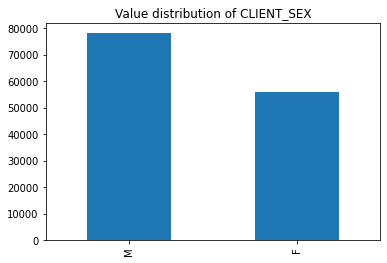

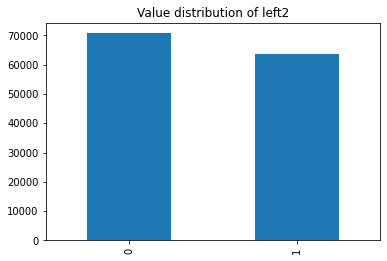

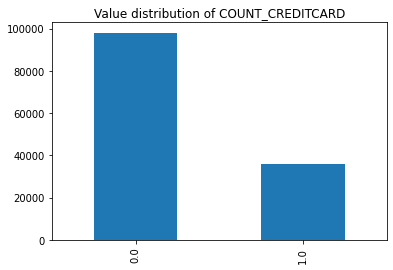

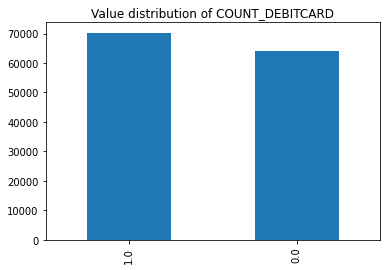

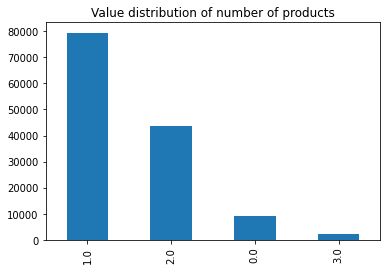

In [ ]:
### OUTLIER DETECTION
for col in categorial_var:
  stats = df_merged[col].value_counts()
  stats = stats/df_merged.shape[0]
  outlier_values = stats[stats < 0.001]
  if len(outlier_values) > 0:
    print("Outlier detected:", ';'.join([str(i) for i in outlier_values.index]))
  df_merged[col].value_counts().plot(kind = 'bar')
  plt.title(f"Value distribution of {col}")
  plt.show()
  


In [ ]:
### xu li outlier trong bien age
df_merged = df_merged[df_merged['age'] <100]

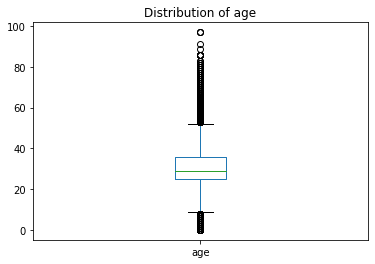

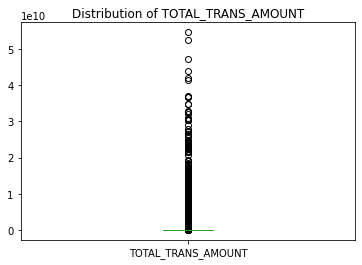

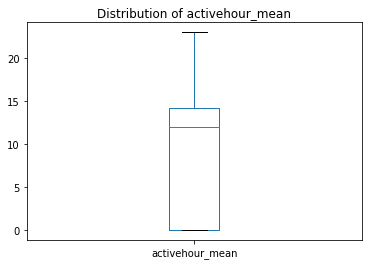

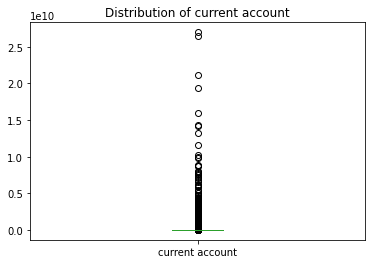

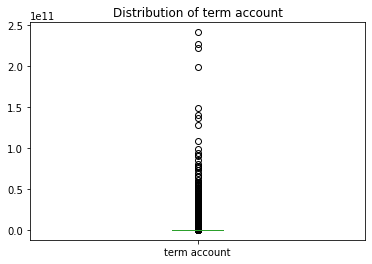

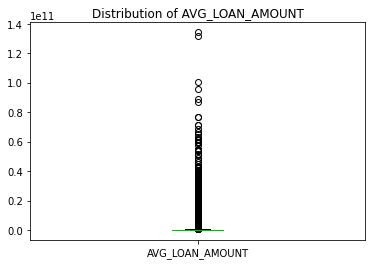

In [ ]:
for col in numerical_var:
    df_merged[col].plot(kind= "box")
    plt.title(f"Distribution of {col}")
    plt.show()


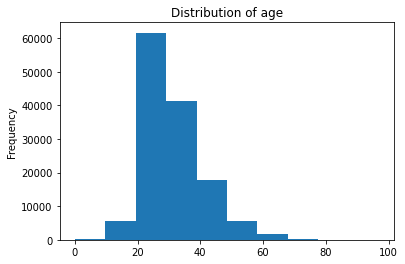

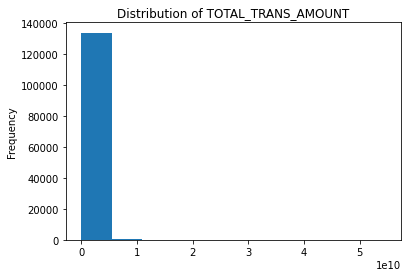

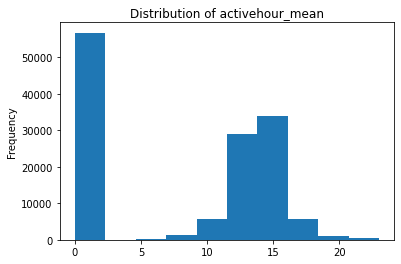

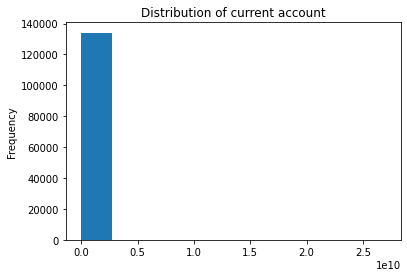

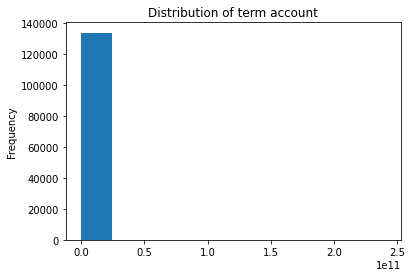

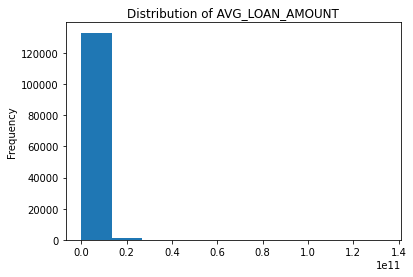

In [ ]:
for col in numerical_var:
    df_merged[col].plot(kind= "hist")
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
df_merged = df_merged[df_merged['age']<100]

## PHAAN TICH DON NHAN TO


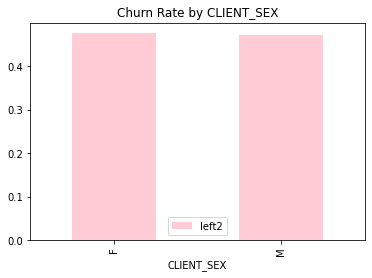

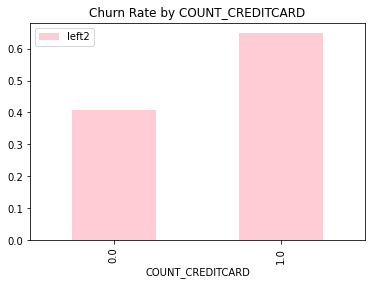

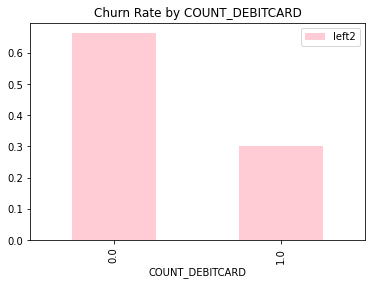

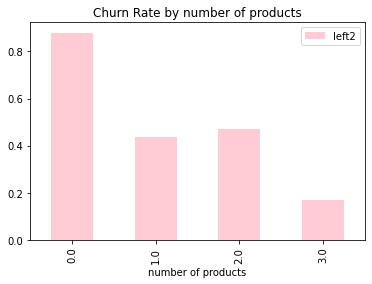

In [ ]:
categorial_var.remove('left2')
for var in categorial_var:
    df_merged.groupby(var).agg({'left2':'mean'}).plot(kind='bar', alpha =0.8, color='pink')
    plt.title(f"Churn Rate by {var}")
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


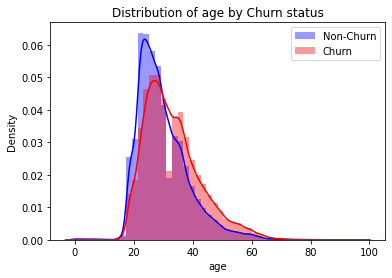

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


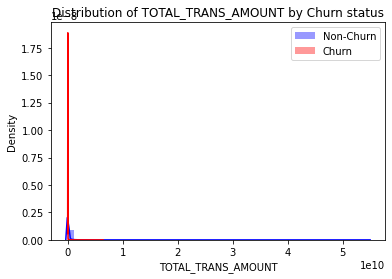

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


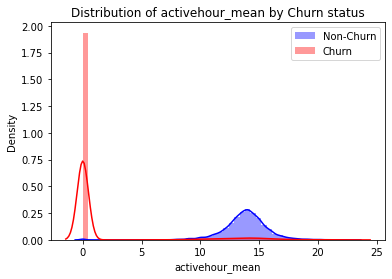

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


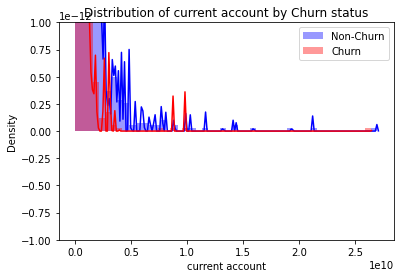

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


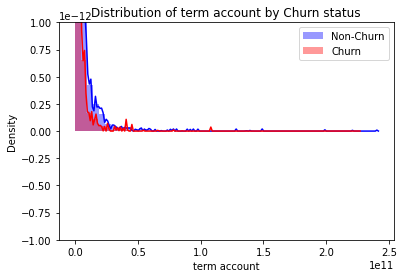

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


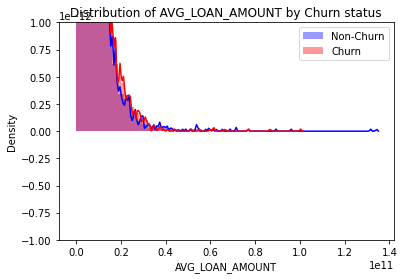

In [ ]:
for var in numerical_var:
    sns.distplot(df_merged[df_merged.left2 == 0][var], label = 'Non-Churn', color='blue')
    sns.distplot(df_merged[df_merged.left2==1][var], label = 'Churn',color='red')
    plt.title(f'Distribution of {var} by Churn status')
    plt.legend()
    plt.show()

### MODELLING

In [ ]:
### One-hot encoding categorical variables
transformed_df = pd.get_dummies(df_merged)

In [ ]:
dep_var = "left2"
ind_var = list(transformed_df.columns)
ind_var.remove(dep_var)

In [ ]:
from sklearn.model_selection import train_test_split
## Split data into Training set and Test set
train_data, test_data = train_test_split(transformed_df, train_size = 0.8,random_state=10, shuffle=True)

In [ ]:
X_train, X_test = train_data[ind_var], test_data[ind_var]
y_train, y_test = train_data[dep_var], test_data[dep_var]

In [ ]:
## Start Modelling
### Initialize the model with default configuration
model = LogisticRegression()

In [ ]:
### Training the model
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
## Evaluate model's performance
y_test_predicted = model.predict(X_test)


In [ ]:
y_test_predicted

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
acc = sum(y_test == y_test_predicted)/len(y_test)
print("Model Accuracy",acc)

Model Accuracy 0.7438133571854502
